# 📚 Imports

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 📖 Data

In [227]:
df = pd.read_csv('data/Diabetes Dataset By Age Standardized Countries.csv')

In [228]:
df.head()

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.044712,0.015339,0.094918
1,Afghanistan,AFG,Men,1981,0.046114,0.016883,0.093777
2,Afghanistan,AFG,Men,1982,0.047601,0.018745,0.094018
3,Afghanistan,AFG,Men,1983,0.049173,0.020375,0.093950
4,Afghanistan,AFG,Men,1984,0.050834,0.022269,0.093679


In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14000.0,1997.000000,10.099866,1980.000000,1988.000000,1997.000000,2006.000000,2014.000000
Age-standardised diabetes prevalence,14000.0,0.075125,0.042190,0.010075,0.050328,0.064552,0.085271,0.328625
Lower 95% uncertainty interval,14000.0,0.044986,0.031686,0.001764,0.026392,0.037424,0.052350,0.232951
Upper 95% uncertainty interval,14000.0,0.115953,0.054215,0.029001,0.082562,0.102309,0.131149,0.465821


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country/Region/World                  14000 non-null  object 
 1   ISO                                   14000 non-null  object 
 2   Sex                                   14000 non-null  object 
 3   Year                                  14000 non-null  int64  
 4   Age-standardised diabetes prevalence  14000 non-null  float64
 5   Lower 95% uncertainty interval        14000 non-null  float64
 6   Upper 95% uncertainty interval        14000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 765.8+ KB


# 📊 Visualization

In [231]:
def plot_line_chart_by_year(df, year, column):
    
    # Group the mean data by year
    mean_by_year = df.groupby(year)[column].mean()

    # Style
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))

    # Plot the line chart
    plt.plot(mean_by_year.index, mean_by_year.values, color='limegreen', linewidth=2)

    # Set up other visual elements
    plt.xlabel(year, fontsize = 14, color = 'white')
    plt.ylabel(column, fontsize = 14, color = 'white')
    plt.title(f'{column} by Year', fontsize = 16, color = 'white')

    # Set the colors of ticks and texts
    plt.tick_params(colors = 'white')
    plt.xticks(fontsize = 12, color = 'white')
    plt.yticks(fontsize = 12, color = 'white')
    
    plt.show()

# 📈 Numeric Columns by Year

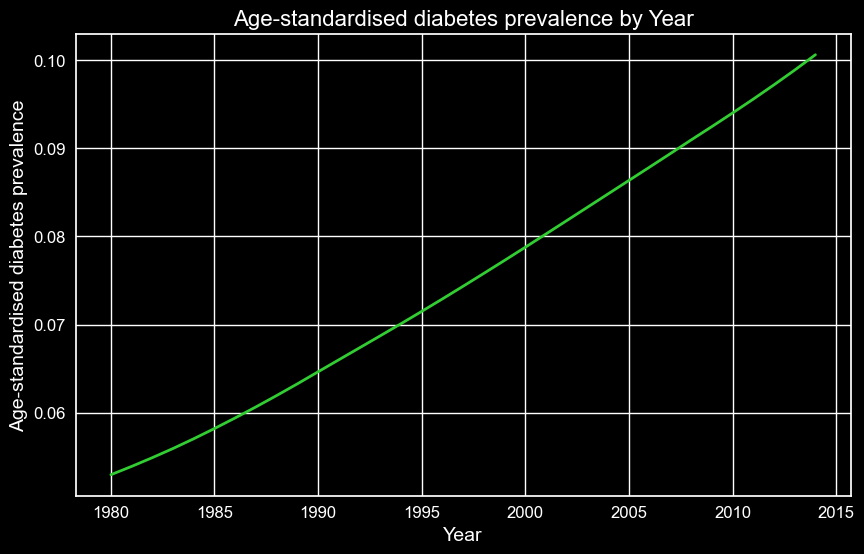

In [232]:
plot_line_chart_by_year(df, 'Year', 'Age-standardised diabetes prevalence')

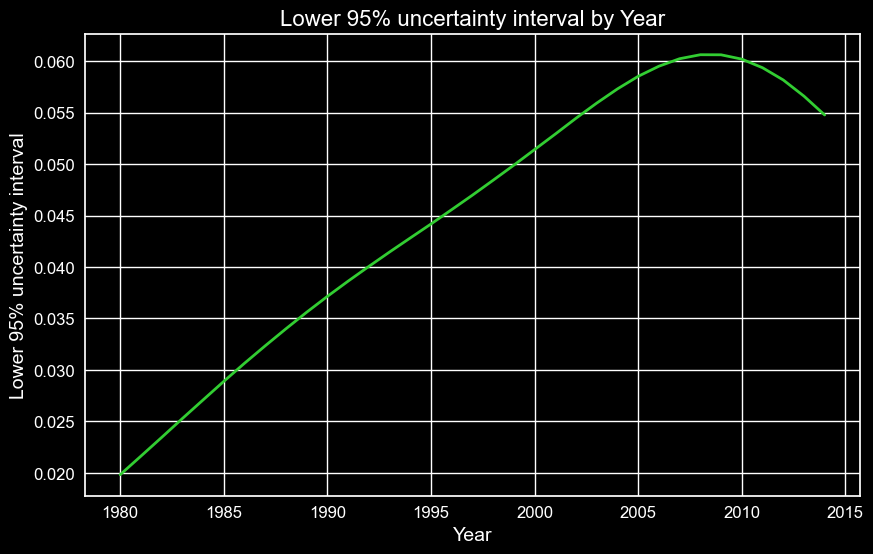

In [233]:
plot_line_chart_by_year(df, 'Year', 'Lower 95% uncertainty interval')

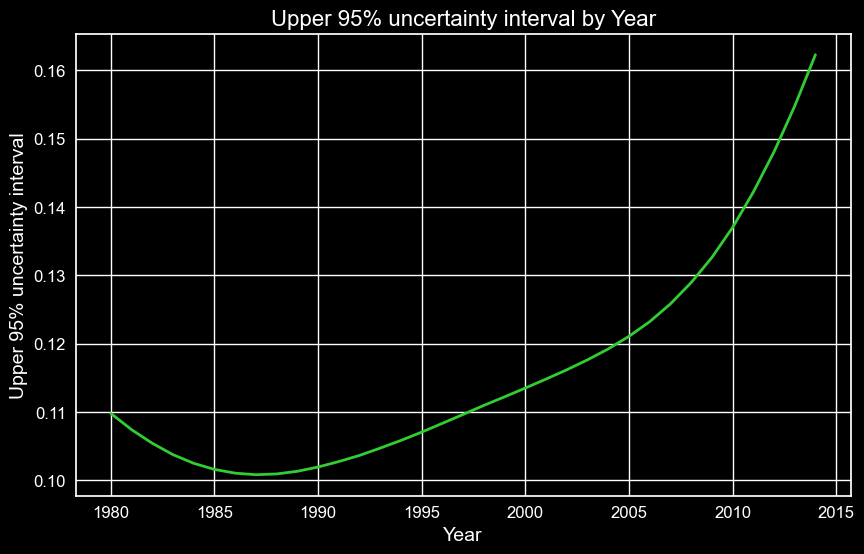

In [234]:
plot_line_chart_by_year(df, 'Year', 'Upper 95% uncertainty interval')

# 🧮 Distribution of Variables

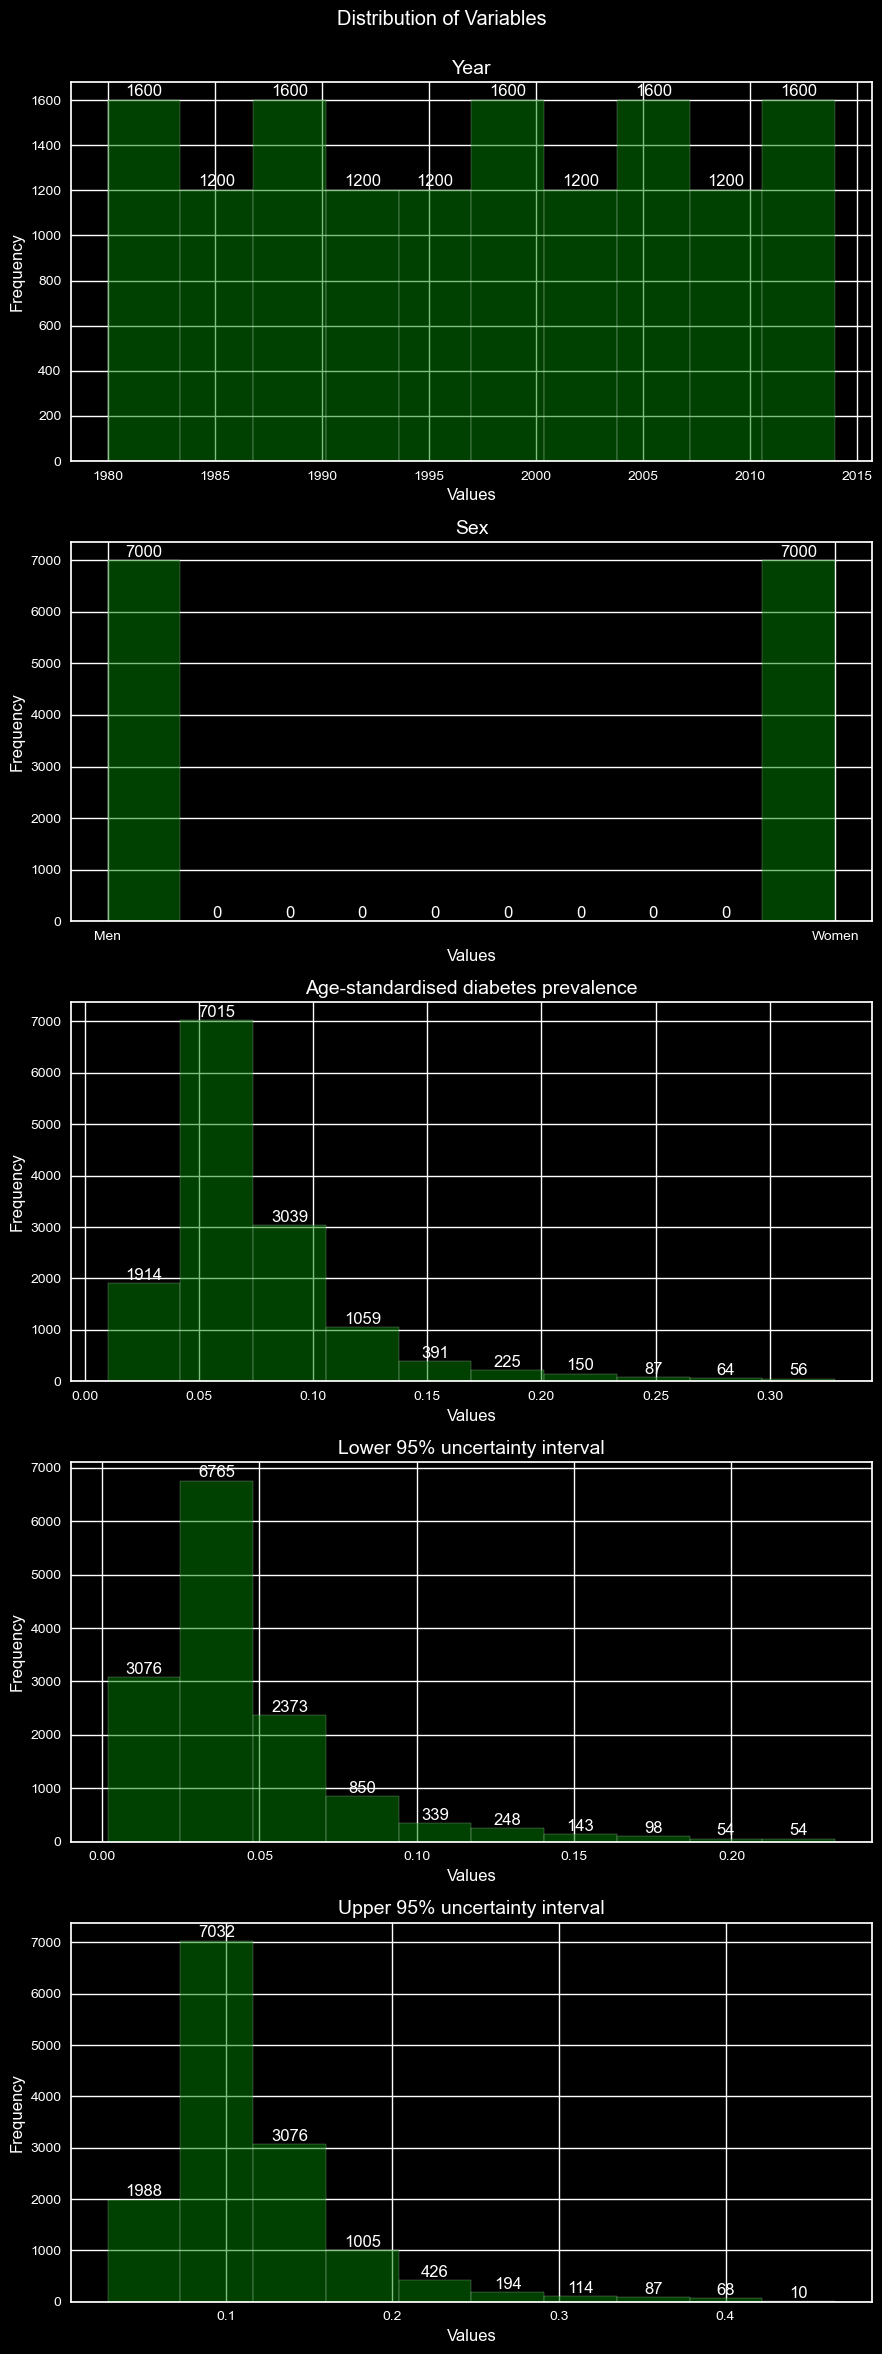

In [235]:
list_columns = ['Year', 'Sex', 'Age-standardised diabetes prevalence',
                'Lower 95% uncertainty interval', 'Upper 95% uncertainty interval']

fig, axs = plt.subplots(5, 1, figsize = (9, 24), facecolor = 'black')
fig.suptitle('Distribution of Variables', color = 'white')

# Loop through the columns and create histograms
for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(df[column], color = 'green', alpha = 0.5)
    ax.set_title(column, fontsize = 14, color = 'white')
    ax.set_xlabel('Values', fontsize = 12, color = 'white')
    ax.set_ylabel('Frequency', fontsize = 12, color = 'white')
    ax.grid(True)
    ax.tick_params(colors='white')
    ax.set_facecolor('black')

    # Add values and labels to the histograms
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{height:.0f}',
                ha = 'center', va = 'bottom', color = 'white')
    
# Adjust layout and display the plots
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

plt.show()

# 📉 Top 10 Country/Region/World with the highest average

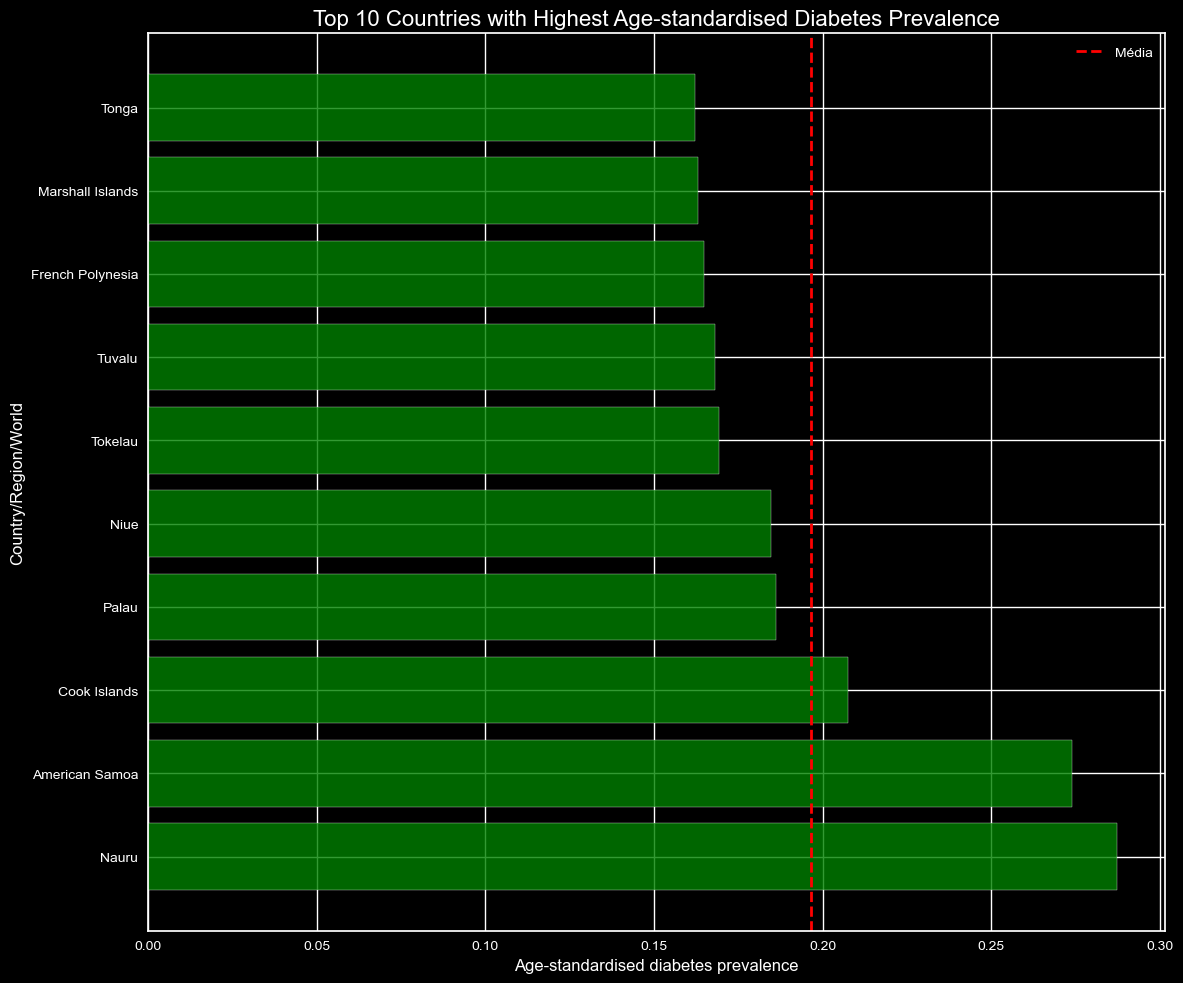

In [237]:
media_prevalence = df.groupby('Country/Region/World')['Age-standardised diabetes prevalence'].mean()
media_prevalence = media_prevalence.sort_values(ascending=False).head(10)

plt.figure(figsize = (12, 10))
plt.barh(media_prevalence.index, media_prevalence.values, color = 'green', alpha = 0.8)
plt.axvline(media_prevalence.mean(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Média')
plt.xlabel('Age-standardised diabetes prevalence', fontsize = 12)
plt.ylabel('Country/Region/World', fontsize = 12) 
plt.title('Top 10 Countries with Highest Age-standardised Diabetes Prevalence', fontsize = 16)
plt.legend()
plt.tight_layout()
plt.show()

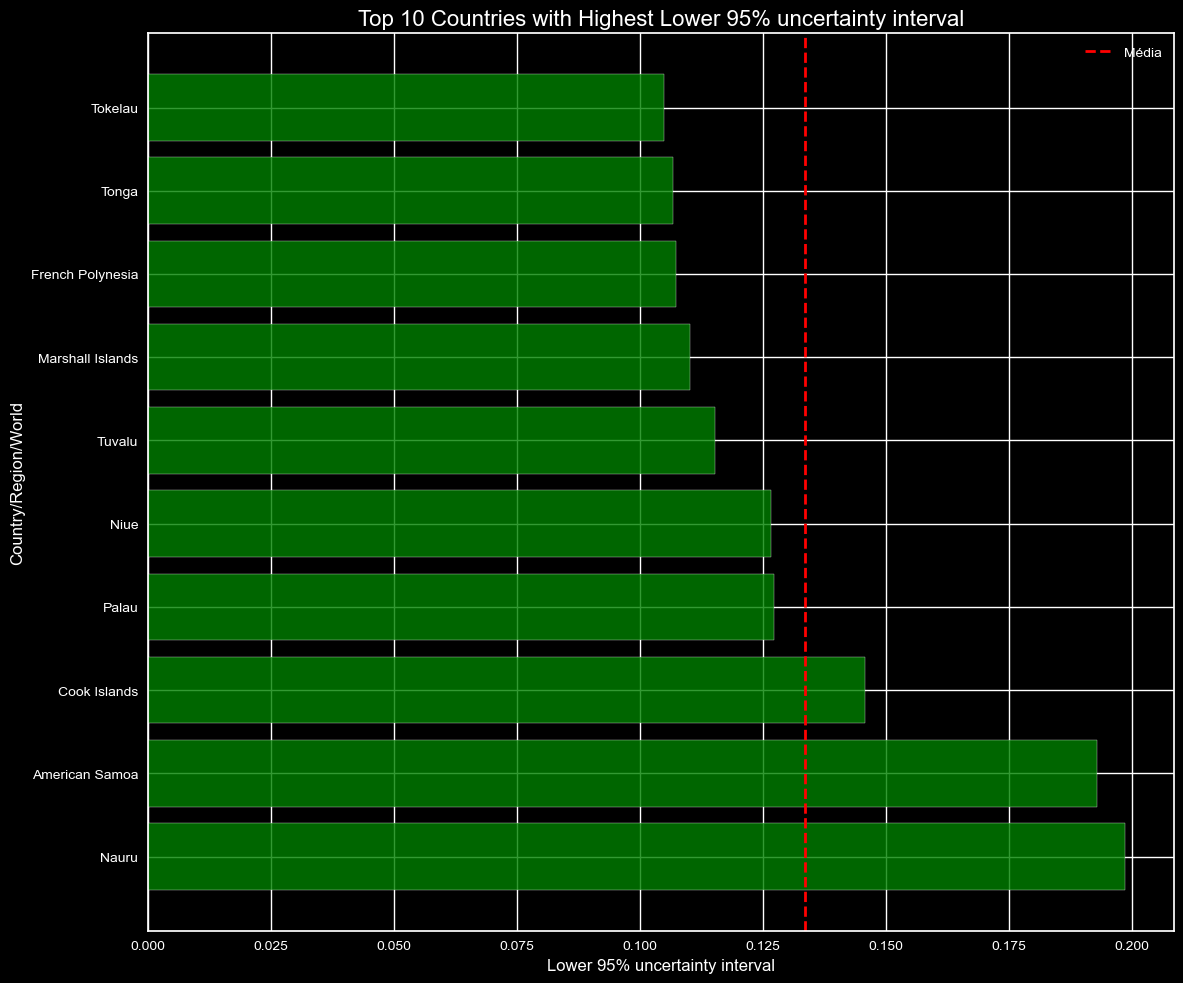

In [238]:
media_prevalence = df.groupby('Country/Region/World')['Lower 95% uncertainty interval'].mean()
media_prevalence = media_prevalence.sort_values(ascending=False).head(10)

plt.figure(figsize = (12, 10))
plt.barh(media_prevalence.index, media_prevalence.values, color = 'green', alpha = 0.8)
plt.axvline(media_prevalence.mean(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Média')
plt.xlabel('Lower 95% uncertainty interval', fontsize = 12)
plt.ylabel('Country/Region/World', fontsize = 12) 
plt.title('Top 10 Countries with Highest Lower 95% uncertainty interval', fontsize = 16)
plt.legend()
plt.tight_layout()
plt.show()

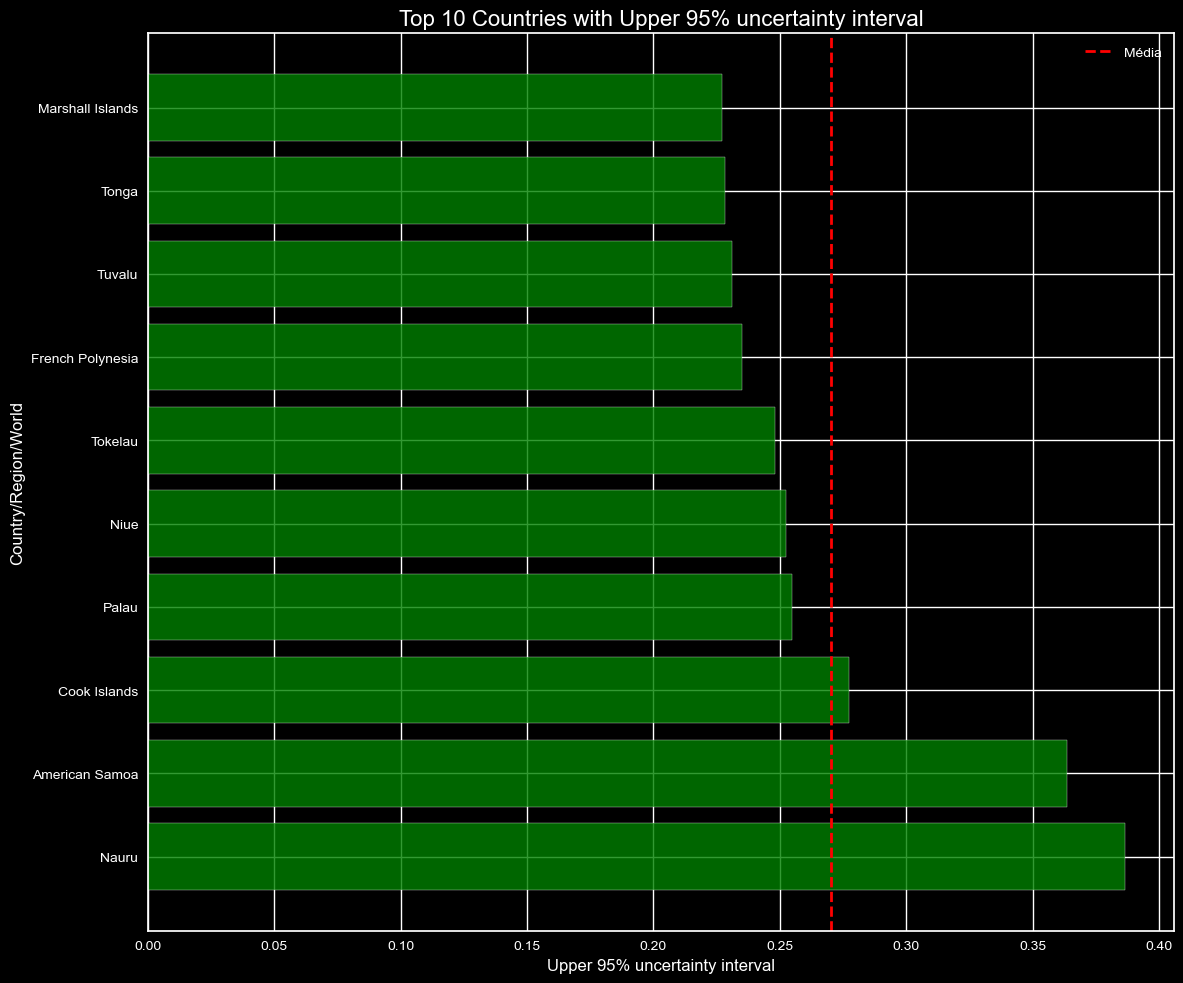

In [239]:
media_prevalence = df.groupby('Country/Region/World')['Upper 95% uncertainty interval'].mean()
media_prevalence = media_prevalence.sort_values(ascending=False).head(10)

plt.figure(figsize = (12, 10))
plt.barh(media_prevalence.index, media_prevalence.values, color = 'green', alpha = 0.8)
plt.axvline(media_prevalence.mean(), color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Média')
plt.xlabel('Upper 95% uncertainty interval', fontsize = 12)
plt.ylabel('Country/Region/World', fontsize = 12) 
plt.title('Top 10 Countries with Upper 95% uncertainty interval', fontsize = 16)
plt.legend()
plt.tight_layout()
plt.show()

# 📅 Correlation 

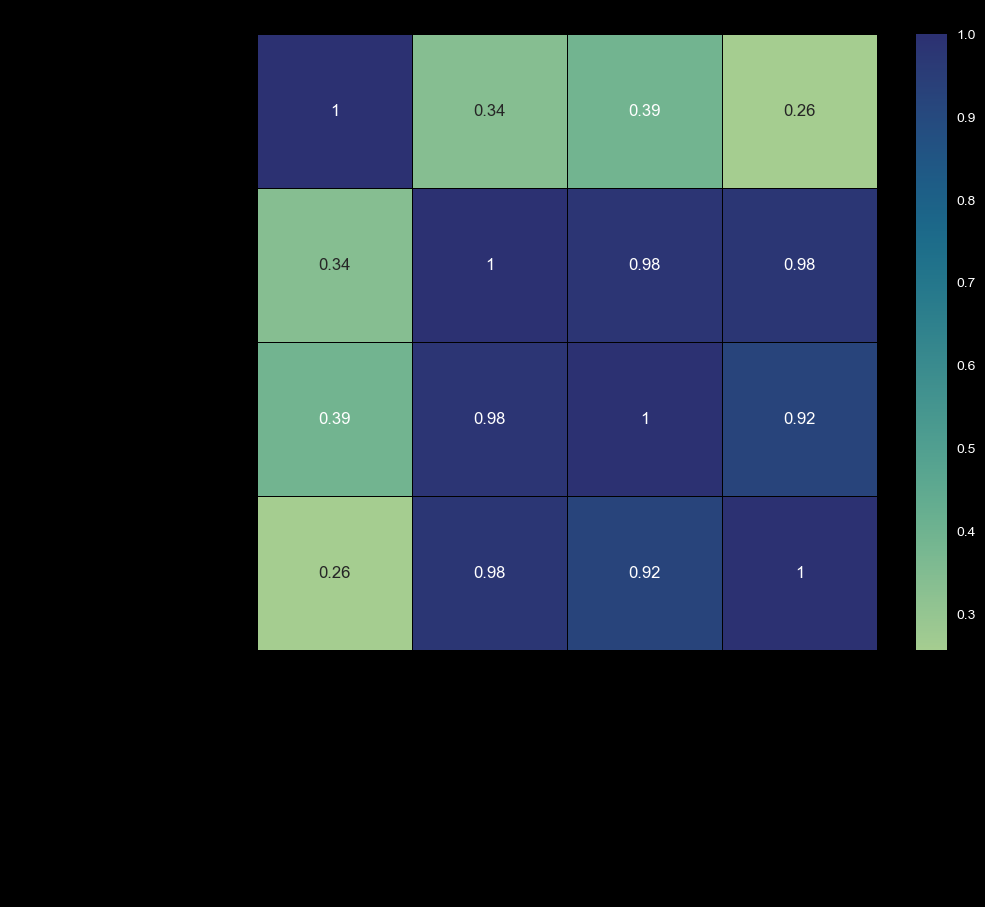

In [236]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'crest', annot = True, cbar = True, linewidths = 0.5, linecolor = 'black')
plt.title('Correlation Heatmap', color = 'black', fontsize = 16)
plt.tick_params(colors = 'black')
plt.show()

# ✂️ Train and Test
---

In [244]:
# Transforming Men == 0 | Women == 1
df['Sex'] = df['Sex'].map({'Men': 0, 'Women': 1})

In [245]:
X = df.drop(['Country/Region/World', 'ISO', 'Age-standardised diabetes prevalence'], axis = 1)
y = df['Age-standardised diabetes prevalence']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

# 🏋🏾‍♀️ Training
---

In [246]:
et = ExtraTreesRegressor(random_state=0)
et.fit(xtrain, ytrain)
pred = et.predict(xtest)

# 🎯 Results
---

In [247]:
print('R2 Score: ', r2_score(ytest, pred))
print("MSE: ", mean_squared_error(ytest, pred))
print("MAE: ", mean_absolute_error(ytest, pred))

R2 Score:  0.9996255145917033
MSE:  6.633981494125092e-07
MAE:  0.0005696153616420866


# 🏁 The End! Feel free to criticize! 🏁